# Analyze output of .hdf5 files of hadrons code
June 12, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import subprocess as sp
import os 
import glob
import pandas as pd
import itertools

In [3]:
import gvar as gv
import h5py

In [4]:
%matplotlib notebook

m_f = 0.6449 \
m_res < 10^-3

$ m_phys = m_f + m_res $ 

In [23]:
main_dir='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/measurements_hadrons/runs/'
epoch=150
output_dir=main_dir+'meas2_Ls8/tioga-40680/'

epoch=140
output_dir=main_dir+'meas1_Ls4/tioga-40681/'

epoch=25
output_dir=main_dir+'meas3_Ls16/tioga-40787/'

f1='eta_s_2pt.{0}.h5'.format(epoch)
f2='prop_gauge_DWF.{0}.h5'.format(epoch)


In [10]:
#  ## Code to explore hdf5 data
# def get_ds_dictionaries(name, node):
  
#     fullname = node.name
#     if isinstance(node, h5py.Dataset):
#     # node is a dataset
#         print(f'Dataset: {fullname}; adding to dictionary')
#         ds_dict[fullname] = node[:]
#         print('ds_dict size', len(ds_dict)) 
#     else:
#      # node is a group
#         print(f'Group: {fullname}; skipping')  
    
    
# ds_dict= {}    
# with h5py.File(output_dir+f1) as hf:
#     print(hf.visititems(get_ds_dictionaries))
# print(ds_dict)

# ds_dict= {}    
# with h5py.File(output_dir+f2) as hf:
#     print(hf.visititems(get_ds_dictionaries))
# print(ds_dict)
    
    

In [25]:
## Modules

def f_extract_meson(fname,meson_dict):
    
    with h5py.File(fname) as hf:
#         print(hf.keys())
        meson_dict['corr']=hf['meson']['meson_0']['corr'][:]

    return meson_dict

def f_extract_wi(fname,wi_dict):
    
    with h5py.File(fname) as hf:
#         print(hf.keys())
        for key1,value1 in hf['wardIdentity'].items():
    #         print(key1,value1)
            a1=hf['wardIdentity'][key1]
            wi_dict[key1]=a1[:]

    return wi_dict
    
    
def f_compute_mresidual(wi_dict,meson_dict):
    
    arr=np.array([i[0]/j[0] for i,j in zip(wi_dict['PJ5q'],meson_dict['corr'])])

    return arr

In [51]:
# wi_dict

In [32]:

meson_dict={}
meson_dict=f_extract_meson(output_dir+f1,meson_dict)

wi_dict={}
wi_dict=f_extract_wi(output_dir+f2,wi_dict)

m_res=f_compute_mresidual(wi_dict,meson_dict)
print(m_res)

[0.00631109 0.01532535 0.04361821 0.08153696 0.1342451  0.19292046
 0.28604602 0.36377199 0.42760866 0.47084857 0.53380314 0.58704083
 0.61765679 0.64664228 0.67437549 0.67954697 0.70293213 0.71312271
 0.69147543 0.65958393 0.63472811 0.5835634  0.5435166  0.48787556
 0.42100526 0.35443283 0.27275709 0.19478397 0.13124376 0.08113325
 0.04635813 0.01039996]


<IPython.core.display.Javascript object>


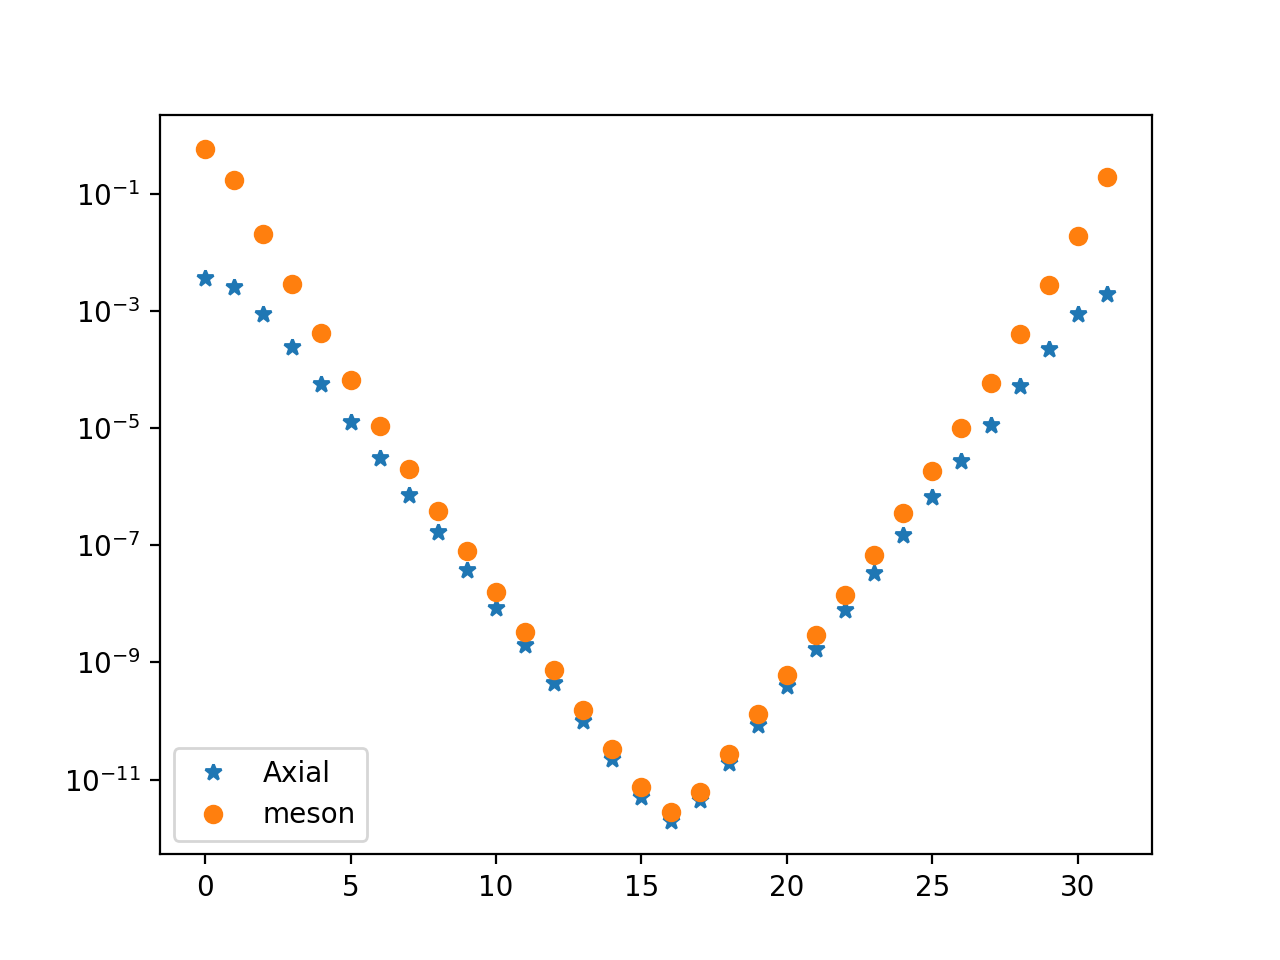

In [50]:
plt.figure()
y1=[i[0] for i in wi_dict['PJ5q']]
plt.plot(y1,linestyle='',marker='*',label='Axial')

y2=[i[0] for i in meson_dict['corr']]
plt.plot(y2,linestyle='',marker='o',label='meson')
plt.yscale('log')
plt.legend()

<IPython.core.display.Javascript object>


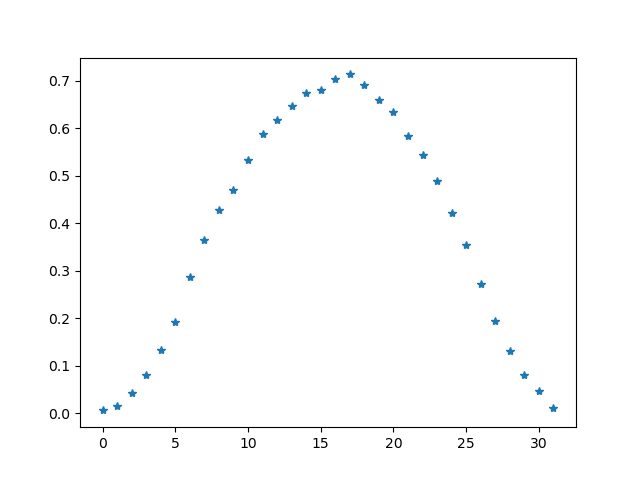

In [31]:
plt.figure()
plt.plot(m_res,linestyle='',marker='*')
